# Setting Up

In [2]:
#import libraries 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
from decimal import Decimal
import mimetypes
import urllib
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator, FuncFormatter
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
from matplotlib import rc
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition, mark_inset, zoomed_inset_axes)
# import google colab to use google colab as editor
# if you use other editor, do not need to import google.colab here
from google.colab import drive	
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  


In [3]:
## setting path
# get current path
path_current = os.getcwd()
# the path is where the dataset saved
path = path_current + '/drive/My Drive/RMIT/Visualization/Data/' 
# the "path_img" is the position where final image will be saved
path_img = path_current + '/drive/My Drive/RMIT/Visualization/Images/'

# Line Class


In [40]:
class line:  

  # read file function 
  def read_file(self,file):
    file_url = urllib.request.pathname2url(file)
    ftype = mimetypes.guess_type(file_url, strict=True)[0]

    ## read data file according to its formate, default includes three types of files: csv/excel/text
    # read csv format data from the parking dataset
    if 'csv' in ftype:
      # usecols: return a subset of the columns, here choose one column to use in the line chart
      data = pd.read_csv(path+file)
    # read excel format data from the parking dataset
    elif 'sheet' in ftype:
      data = pd.read_excel(path+file)
    # read text format data from the parking dataset
    elif ftype == 'text/plain':
      data = pd.read_csv(path+file, sep="\t")
    else:
      print("File type cannot find!")
    return data

  ## line chart plotting function
  # file: file name of your data source
  # x_col_name: ['index'] or ['x_column_name_a','x_column_name_b'...]
  # y_col_name: ['y_column_name_a','y_column_name_b'...]
  # x_label: x axis label 
  # y_label: y axis label
  # legend_label: legend labels names
  # paper_type: 'single' or 'double'
  

  def plot(self, file, x_col_name, y_col_name, x_label, y_label, legend_label, paper_type, **kwargs):

    ## Configuration of the line chart
    # plotwidth: width of the plot
    # plotheight: height of the plot
    # backgrid: backgrid of the plot
    # isframe: frame of the plot
    # my_font: the typeface of x, y labels
    # linewidth: linewidth of the lines in the plot
    # gridlinewidth: if backgrid is True, grid linewidth is the line width of background grid
    # sa_linecolor: single column paper linecolors pallette
    # da_linecolor: double columns paper linecolors pallette 
    # linestyle: line shapes library 
    # labeltext_size: text size of x,y labels
    # labelpad: pad size of label
    # legend_size: size of legend
    # legend_loc: location of legend
    # ncol: number of columns of legend
    # title: True or False as options. If it is True, add title for the plot
    # title_pad: if the title is True, modify pad size of title
    # title_size: if the title is True, modify size of title
    # title_loc: if the title is True, modify location of title
    # markers: True or False as options. If it is True, add markers
    # markersize: if the title is True, modify size of marker
    # markers_shape: shapes library of marker
    # xy_lim: True or False as options. If it is True, add x and y axis' value range
    # x_range: if the xy_lim is True, set x axis range
    # y_range: if the xy_lim is True, set x axis range
    # inset: True or False as options. If it is True, add inset plot 
    # xin_start: if the inset is True, the inset plot x axis starts from xin_start
    # xin_end: if the inset is True, the inset plot x axis ends from xin_end
    # yin_start: if the inset is True, the inset plot y axis starts from yin_start
    # yin_end:  if the inset is True, the inset plot y axis starts from yin_end
    # ticks: True or False as options. If it is True, add ticks of x and y axis.
    # tick_size: size of tick 
    # tick_direction: 'out', 'inout' and 'in' options.
    # x_minor_locator: number of minor ticks in x axis
    # y_minor_locator: number of minor ticks in y axis
    # present_linevalue: True or False as options. If it is True, present point value in the line
    # double_axis: True or False as options. If it is True, add second axis on the right of figure     
    # save_image: True or False as options. If it is True, save chart
    # savefig_bbox_inches: Bounding box in inches
    single_column_conf={'plotwidth':8,
              'plothight':6,
              'backgrid':True,
              'isframe':True,
              'my_font':'DejaVu Sans',
              'linewidth':2,
              'gridlinewidth':0.5,              
              'sa_linecolor':['#0173B2', '#DE8F05', '#029E73', '#D55E00', 
                      '#CC78BC', '#8E5638', '#FBAFE4', '#949494', 
                      '#ECE133', '#56B4E9'],
              'da_linecolor':{'left':['#D6DEBF','#AECEA1','#82BB92','#5EA28D',
                          '#49838A','#3E5F7E','#383C65','#2B1E3E'],
                      'right':['#2C1E3D','#51315E','#764476','#9A5B88',
                          '#B77495','#CF91A3','#E0B1B4','#EDD1CB']},              
              'linestyle':['-',':','-.','--','-',':','-.','--','-','-',':','-.'],  
              'labeltext_size':18,
              'labelpad':10,
              'legend_size':10,
              'legend_loc':'upper right',
              'ncol':2,
              'title':False,
              'title_pad':10,
              'title_size':20,
              'title_loc':'center',  
              'markers':False,
              'markersize':8,
              'markers_shape':['o','v','D','X','P','2','p','x','d','4','<','*'], 
              'xy_lim':True,
              'x_range':False,
              'y_range':False,
              'xin_start':0, 
              'xin_end':0, 
              'yin_start':0, 
              'yin_end':0,
              'ticks':True,
              'tick_size':14,
              'tick_direction':'out',
              'x_minor_locator':5,
              'y_minor_locator':2, 
              'present_linevalue':False,
              'double_axis':False, 
              'inset':False,
              'save_image':False,
              'savefig_bbox_inches':'tight'}

    double_column_conf={'plotwidth':8,
              'plothight':6,
              'backgrid':True,
              'isframe':True,
              'my_font':'DejaVu Sans',
              'linewidth':2,
              'gridlinewidth':0.5,              
              'sa_linecolor':['#0173B2', '#DE8F05', '#029E73', '#D55E00', 
                      '#CC78BC', '#8E5638', '#FBAFE4', '#949494', 
                      '#ECE133', '#56B4E9'],
              'da_linecolor':{'left':['#D6DEBF','#AECEA1','#82BB92','#5EA28D',
                          '#49838A','#3E5F7E','#383C65','#2B1E3E'],
                      'right':['#2C1E3D','#51315E','#764476','#9A5B88',
                          '#B77495','#CF91A3','#E0B1B4','#EDD1CB']},              
              'linestyle':['-',':','-.','--','-',':','-.','--','-','-',':','-.'],  
              'labeltext_size':18,
              'labelpad':10,
              'legend_size':10,
              'legend_loc':'upper right',
              'ncol':2,
              'title_pad':10,
              'title':False,
              'title_size':20,
              'title_loc':'center',  
              'markers':False,
              'markersize':8,
              'markers_shape':['o','v','D','X','P','2','p','x','d','4','<','*'], 
              'xy_lim':True,
              'x_range':False,
              'y_range':False,
              'xin_start':0, 
              'xin_end':0, 
              'yin_start':0, 
              'yin_end':0,
              'ticks':True,
              'tick_size':14,
              'tick_direction':'out',
              'x_minor_locator':5,
              'y_minor_locator':2, 
              'present_linevalue':False,
              'double_axis':False, 
              'inset':False,
              'save_image':False,
              'savefig_bbox_inches':'tight'}

    if paper_type == 'single':
      conf = single_column_conf
    elif paper_type == 'double':
      conf = double_column_conf 
    
    # when new configuraton is set, update the original one
    conf.update(kwargs)
    conf['da_linecolor']['right']
    # color labels setting 


    #Initializing the line
    ## plot size setting
    # figsize: the size of the line chart, (width,hight)
    fig, ax_1eft = plt.subplots(figsize =(conf['plotwidth'], conf['plothight']))
      
    ## background grid setting
    if conf['backgrid'] == True:
      ax_1eft.grid(linestyle="--", linewidth=conf['gridlinewidth'], color='gray', alpha=0.5)
    
    # read file
    try:
      data = self.read_file(file)
    except Exception:
      print('Sorry, this file does not exist, please check the file name')
     
    # Plotting single axis line chart
    if conf['double_axis'] == False:
      
      ## x, y axis setting
      # fontsize: x, y title size
      # labelpad: scalar, optional, default: None 
      ax_1eft.set_xlabel(x_label, fontproperties=conf['my_font'], fontsize=conf['labeltext_size'], labelpad=conf['labelpad'])
      ax_1eft.set_ylabel(y_label, fontproperties=conf['my_font'], fontsize=conf['labeltext_size'], labelpad=conf['labelpad'])
      
      # use the plot function
      # linewidth: the line width, here set to 2
      # x column is index
      if x_col_name[0] == 'index':
        # line with markers
        if conf['markers'] == True:
          for i in range(0, len(y_col_name)):
            ax_1eft.plot(data.index, data[y_col_name[i]], marker=conf['markers_shape'][i], markersize=conf['markersize'], 
                      linestyle=conf['linestyle'][0], linewidth=conf['linewidth'], label=legend_label[i], color=conf['sa_linecolor'][i])    
        # line without markers    
        else:
          for i in range(0, len(y_col_name)):
            ax_1eft.plot(data.index, data[y_col_name[i]], linestyle=conf['linestyle'][0], 
                    linewidth=conf['linewidth'], label=legend_label[i], color=conf['sa_linecolor'][i])

      # x column is not index
      else:
        # line with markers
        if conf['markers'] == True:
          for i in range(0, len(y_col_name)):
            if len(x_col_name)==1:
              ax_1eft.plot(data[x_col_name[0]], data[y_col_name[i]], marker=conf['markers_shape'][i], markersize=conf['markersize'], 
                      linestyle=conf['linestyle'][0], linewidth=conf['linewidth'], label=legend_label[i], color=conf['sa_linecolor'][i])
            else: 
              ax_1eft.plot(data[x_col_name[i]], data[y_col_name[i]], marker=conf['markers_shape'][i], markersize=conf['markersize'], 
                      linestyle=conf['linestyle'][0], linewidth=conf['linewidth'], label=legend_label[i], color=conf['sa_linecolor'][i])
        # line without markers    
        else:
          for i in range(0, len(y_col_name)):
            if len(x_col_name)==1:
              ax_1eft.plot(data[x_col_name[0]], data[y_col_name[i]], linestyle=conf['linestyle'][0], linewidth=conf['linewidth'], 
                      label=legend_label[i], color=conf['sa_linecolor'][i])
            else:
              ax_1eft.plot(data[x_col_name[i]], data[y_col_name[i]], linestyle=conf['linestyle'][0], linewidth=conf['linewidth'], 
                      label=legend_label[i], color=conf['sa_linecolor'][i])             

    
      if conf['inset'] == True:
      
        axins = zoomed_inset_axes(ax_1eft, 3, bbox_to_anchor=(0.43,0.7), bbox_transform=ax_1eft.transAxes) 
      
        ## drawing lines of inset plot
        
        # use the plot function
        # linewidth: the line width, here set to 2
        # x column is index
        if x_col_name[0] == 'index':
          # line with markers
          if conf['markers'] == True:
            for i in range(0, len(y_col_name)):
              axins.plot(data.index, data[y_col_name[i]], marker=conf['markers_shape'][i], markersize=conf['markersize'], 
                      linestyle=conf['linestyle'][0], linewidth=conf['linewidth'], label=legend_label[i], color=conf['sa_linecolor'][i])    
          # line without markers    
          else:
            for i in range(0, len(y_col_name)):
              axins.plot(data.index, data[y_col_name[i]], linestyle=conf['linestyle'][0], linewidth=conf['linewidth'], 
                      label=legend_label[i], color=conf['sa_linecolor'][i])
        # x column is not index
        else:
          # line with markers
          if conf['markers'] == True:
            for i in range(0, len(y_col_name)):
              if len(x_col_name)==1: 
                axins.plot(data[x_col_name[0]],data[y_col_name[i]], marker=conf['markers_shape'][i], markersize=conf['markersize'], 
                      linestyle=conf['linestyle'][0], linewidth=conf['linewidth'], label=legend_label_l[i], color=conf['sa_linecolor'][i]) 
              else:
                axins.plot(data[x_col_name[i]],data[y_col_name[i]], marker=conf['markers_shape'][i], markersize=conf['markersize'], 
                      linestyle=conf['linestyle'][0], linewidth=conf['linewidth'], label=legend_label_l[i], color=conf['sa_linecolor'][i])   
          # line without markers    
          else:
            for i in range(0, len(y_col_name)):
              if len(x_col_name)==1: 
                axins.plot(data[x_col_name[0]],data[y_col_name[i]], linestyle=conf['linestyle'][0], linewidth=conf['linewidth'], 
                      label=legend_label[i], color=conf['sa_linecolor'][i])
              else:
                axins.plot(data[x_col_name[i]],data[y_col_name[i]], linestyle=conf['linestyle'][0], linewidth=conf['linewidth'], 
                      label=legend_label[i], color=conf['sa_linecolor'][i])

        ## inset plot x,y axis range limit
        axins.set_xlim(conf['xin_start'], conf['xin_end'])
        axins.set_ylim(conf['yin_start'], conf['yin_end']) 

    # double axis line chart
    elif conf['double_axis'] == True:
      
      ## x, y axis setting
      # fontsize: x, y title size
      # labelpad: scalar, optional, default: None 
      ax_1eft.set_xlabel(x_label, fontproperties=conf['my_font'], fontsize=conf['labeltext_size'], labelpad=conf['labelpad'])
      ax_1eft.set_ylabel(y_label[0], fontproperties=conf['my_font'], fontsize=conf['labeltext_size'], labelpad=conf['labelpad'])
      
      
      # left x,y columns and labels
      x_col_name_l = x_col_name[0]
      y_col_name_l = y_col_name[0]
      legend_label_l = legend_label[0]
          
      # use the plot function
      # linewidth: the line width, here set to 2
      # x column is index  
      if x_col_name_l[0] == 'index':
        # line with markers
        
        if conf['markers'] == True:
          for i in range(0, len(y_col_name_l)):
            ax_1eft.plot(data.index, data[y_col_name_l[i]], marker=conf['markers_shape'][i], markersize=conf['markersize'], 
                      linestyle=conf['linestyle'][0], linewidth=conf['linewidth'], label=legend_label_l[i], color=conf['da_linecolor']['left'][i])    
        # line without markers    
        else:
          for i in range(0, len(y_col_name_l)):
            ax_1eft.plot(data.index, data[y_col_name_l[i]], linestyle=conf['linestyle'][0], 
                    linewidth=conf['linewidth'], label=legend_label_l[i], color=conf['da_linecolor']['left'][i])

      # x column is not index
      else:
        # line with markers
        if conf['markers'] == True:
          for i in range(0, len(y_col_name_l)):
            if len(x_col_name_l)==1:
              ax_1eft.plot(data[x_col_name_l[0]], data[y_col_name_l[i]], marker=conf['markers_shape'][i], markersize=conf['markersize'], 
                      linestyle=conf['linestyle'][0], linewidth=conf['linewidth'], label=legend_label_l[i], color=conf['da_linecolor']['left'][i])
            else: 
              ax_1eft.plot(data[x_col_name_l[i]], data[y_col_name_l[i]], marker=conf['markers_shape'][i], markersize=conf['markersize'], 
                      linestyle=linestyle[0], linewidth=conf['linewidth'], label=legend_label_l[i], color=conf['da_linecolor']['left'][i])
        # line without markers    
        else:
          for i in range(0, len(y_col_name_l)):
            if len(x_col_name_l)==1:
              ax_1eft.plot(data[x_col_name_l[0]], data[y_col_name_l[i]], linestyle=conf['linestyle'][0], linewidth=conf['linewidth'], 
                      label=legend_label_l[i], color=conf['da_linecolor']['left'][i])
            else:
              ax_1eft.plot(data[x_col_name_l[i]], data[y_col_name_l[i]], linestyle=conf['linestyle'][0], linewidth=conf['linewidth'], 
                      label=legend_label_l[i], color=conf['da_linecolor']['left'][i])
      
      ## instantiate a left axis that shares the same x-axis
      ax_right = ax_1eft.twinx()
      
      ax_right.set_ylabel(y_label[1], fontproperties=conf['my_font'], fontsize=conf['labeltext_size'], labelpad=conf['labelpad'])    

      # already handled the x-label with ax_1eft
      # alpha: transparency, soft color
     
      # right x,y columns and labels
      x_col_name_r = x_col_name[1]
      y_col_name_r = y_col_name[1]
      legend_label_r = legend_label[1]

      # use the plot function
      # linewidth: the line width, here set to 2
      # x column is index
      if x_col_name_r[0] == 'index':
        # line with markers
        if conf['markers'] == True:
          for i in range(0, len(y_col_name_r)):
            ax_right.plot(data.index, data[y_col_name_r[i]], linestyle=conf['linestyle'][3], marker=conf['markers_shape'][i], markersize=conf['markersize'], 
                linewidth=conf['linewidth'], label=legend_label_r[i], color=conf['da_linecolor']['right'][i])    
        # line without markers    
        else:
          for i in range(0, len(y_col_name_r)):
            ax_right.plot(data.index, data[y_col_name_r[i]], linestyle=conf['linestyle'][3],  
                linewidth=conf['linewidth'], label=legend_label_r[i], color=conf['da_linecolor']['right'][i]) 
      # x column is not index
      else:
        # line with markers
        if conf['markers'] == True:   
          for i in range(0, len(y_col_name_r)):
            if len(x_col_name_r)==1:
              ax_right.plot(data[x_col_name_r[0]], data[y_col_name_r[i]], linestyle=conf['linestyle'][3], marker=conf['markers_shape'][i], markersize=conf['markersize'], 
                  linewidth=conf['linewidth'], label=legend_label_r[i], color=conf['da_linecolor']['right'][i])
            else:
              ax_right.plot(data[x_col_name_r[i]], data[y_col_name_r[i]], linestyle=conf['linestyle'][3], marker=conf['markers_shape'][i], markersize=conf['markersize'], 
                  linewidth=conf['linewidth'], label=legend_label_r[i], color=conf['da_linecolor']['right'][i])
        else:
          for i in range(0, len(y_col_name_r)):
            if len(x_col_name_r)==1:
              ax_right.plot(data[x_col_name_r[0]], data[y_col_name_r[i]], linestyle=conf['linestyle'][3],
                  linewidth=conf['linewidth'], label=legend_label_r[i],color=conf['da_linecolor']['right'][i])
            else:
              ax_right.plot(data[x_col_name_r[i]], data[y_col_name_r[i]], linestyle=conf['linestyle'][3],  
                  linewidth=conf['linewidth'], label=legend_label_r[i],color=conf['da_linecolor']['right'][i])
      
      
      # plotting inset plot 
      if conf['inset'] == True:
      
        zoomed_left_axis = zoomed_inset_axes(ax_1eft, 1, bbox_to_anchor=(0.43,0.7), bbox_transform=ax_1eft.transAxes) 
      
        ## drawing lines of inset plot
        
        # use the plot function
        # linewidth: the line width, here set to 2
        # x column is index
        # use the plot function
        # linewidth: the line width, here set to 2
        # x column is index  
        if x_col_name_l[0] == 'index':
          # line with markers
          
          if conf['markers'] == True:
            for i in range(0, len(y_col_name_l)):
              zoomed_left_axis.plot(data.index, data[y_col_name_l[i]], marker=conf['markers_shape'][i], markersize=conf['markersize'], 
                        linestyle=conf['linestyle'][0], linewidth=conf['linewidth'], label=legend_label_l[i], color=conf['da_linecolor']['left'][i])    
          # line without markers    
          else:
            for i in range(0, len(y_col_name_l)):
              zoomed_left_axis.plot(data.index, data[y_col_name_l[i]], linestyle=conf['linestyle'][0], 
                      linewidth=conf['linewidth'], label=legend_label_l[i], color=conf['da_linecolor']['left'][i])

        # x column is not index
        else:
          # line with markers
          if conf['markers'] == True:
            for i in range(0, len(y_col_name_l)):
              if len(x_col_name_l)==1:
                zoomed_left_axis.plot(data[x_col_name_l[0]], data[y_col_name_l[i]], marker=conf['markers_shape'][i], markersize=conf['markersize'], 
                        linestyle=conf['linestyle'][0], linewidth=conf['linewidth'], label=legend_label_l[i], color=conf['da_linecolor']['left'][i])
              else: 
                zoomed_left_axis.plot(data[x_col_name_l[i]], data[y_col_name_l[i]], marker=conf['markers_shape'][i], markersize=conf['markersize'], 
                        linestyle=conf['linestyle'][0], linewidth=conf['linewidth'], label=legend_label_l[i], color=conf['da_linecolor']['left'][i])
          # line without markers    
          else:
            for i in range(0, len(y_col_name_l)):
              if len(x_col_name_l)==1:
                zoomed_left_axis.plot(data[x_col_name_l[0]], data[y_col_name_l[i]], linestyle=conf['linestyle'][0], linewidth=conf['linewidth'], 
                        label=legend_label_l[i], color=conf['da_linecolor']['left'][i])
              else:
                zoomed_left_axis.plot(data[x_col_name_l[i]], data[y_col_name_l[i]], linestyle=conf['linestyle'][0], linewidth=conf['linewidth'], 
                        label=legend_label_l[i], color=conf['da_linecolor']['left'][i])

        ## inset plot x,y axis range limit
        zoomed_left_axis.set_xlim(conf['xin_start'], conf['xin_end'])
        zoomed_left_axis.set_ylim(conf['yin_start'], conf['yin_end']) 

        zoomed_right_axis = zoomed_left_axis.twinx()
        ## drawing lines of inset plot
        
        # use the plot function
        # linewidth: the line width, here set to 2
        # x column is index
        if x_col_name_r[0] == 'index':
          # line with markers
          if conf['markers'] == True:
            for i in range(0, len(y_col_name_r)):
              zoomed_right_axis.plot(data.index, data[y_col_name_r[i]], linestyle=conf['linestyle'][3], marker=conf['markers_shape'][i], markersize=conf['markersize'], 
                  linewidth=conf['linewidth'], label=legend_label_r[i], color=conf['da_linecolor']['right'][i])    
          # line without markers    
          else:
            for i in range(0, len(y_col_name_r)):
              zoomed_right_axis.plot(data.index, data[y_col_name_r[i]], linestyle=conf['linestyle'][3],  
                  linewidth=conf['linewidth'], label=legend_label_r[i], color=conf['da_linecolor']['right'][i]) 
        # x column is not index
        else:
          # line with markers
          if conf['markers'] == True:   
            for i in range(0, len(y_col_name_r)):
              if len(x_col_name_r)==1:
                zoomed_right_axis.plot(data[x_col_name_r[0]], data[y_col_name_r[i]], linestyle=conf['linestyle'][3], marker=conf['markers_shape'][i], markersize=conf['markersize'], 
                    linewidth=conf['linewidth'], label=legend_label_r[i], color=conf['da_linecolor']['right'][i])
              else:
                zoomed_right_axis.plot(data[x_col_name_r[i]], data[y_col_name_r[i]], linestyle=conf['linestyle'][3], marker=conf['markers_shape'][i], markersize=conf['markersize'], 
                    linewidth=conf['linewidth'], label=legend_label_r[i], color=conf['da_linecolor']['right'][i])
          else:
            for i in range(0, len(y_col_name_r)):
              if len(x_col_name_r)==1:
                zoomed_right_axis.plot(data[x_col_name_r[0]], data[y_col_name_r[i]], linestyle=conf['linestyle'][3],
                    linewidth=conf['linewidth'], label=legend_label_r[i],color=conf['da_linecolor']['right'][i])
              else:
                zoomed_right_axis.plot(data[x_col_name_r[i]], data[y_col_name_r[i]], linestyle=conf['linestyle'][3],  
                    linewidth=conf['linewidth'], label=legend_label_r[i],color=conf['da_linecolor']['right'][i])

      ## presenting values on graph
      if conf['present_linevalue'] == True:
        if x_col_name[0] == 'index':
          for i in range(0, len(y_col_name)):
            for x,y in zip(data.index.values.tolist(),data[y_col_name[i]].values.tolist()):
              plt.text(x, y+0.01, str(round(y,2)), color = color[i])
      
        else:
          for i in range(0, len(y_col_name)):
            for x,y in zip(data[x_col_name[i]].values.tolist(),data[y_col_name[i]].values.tolist()):
              plt.text(x, y+0.01, str(round(y,2)), color = color[i])
      else:
        pass     
     
     
      ## presenting left_axis values on graph
      if conf['present_linevalue'] == True:
        if x_col_name_l[0] == 'index':
          for i in range(0, len(y_col_name_l)):
            for x,y in zip(data.index.values.tolist(),data[y_col_name_l[i]].values.tolist()):
              plt.text(x, y+0.01, str(round(y,2)), color = color[i])
      
        else:
          for i in range(0, len(y_col_name_l)):
            for x,y in zip(data[x_col_name_l[i]].values.tolist(),data[y_col_name_l[i]].values.tolist()):
              plt.text(x, y+0.01, str(round(y,2)), color = color[i])
      else:
        pass

      ## presenting right_axis values on graph
      if conf['present_linevalue'] == True:
        if x_col_name_r[0] == 'index':
          for i in range(0, len(y_col_name_r)):
            for x,y in zip(data.index.values.tolist(),data[y_col_name_r[i]].values.tolist()):
              plt.text(x, y+0.01, str(round(y,2)), color = color[i])
      
        else:
          for i in range(0, len(y_col_name_r)):
            for x,y in zip(data[x_col_name_r[i]].values.tolist(),data[y_col_name_r[i]].values.tolist()):
              plt.text(x, y+0.01, str(round(y,2)), color = color[i])
      else:
        pass    
    
    ## x,y axis range limitation
    if conf['x_range'] == False:
      pass
    else:
      # x axis valure start from xaxis_start value, and end in max of the data add a small range of value
      ax_1eft.set_xlim(conf['x_range'][0], conf['x_range'][1])        

    if conf['y_range'] == False:
      pass
    else:
      # y axis valure start from yaxis_start value, and end in max of the data add a small range of value
      ax_1eft.set_ylim(conf['y_range'][0], conf['y_range'][1])
  
    ## ticks setting
    if conf['ticks'] == True:
    ## major and minor ticks for x axia
    # set x axis' detailed ticks label 
      ax_1eft.xaxis.set_minor_locator(AutoMinorLocator(conf['x_minor_locator']))
    # set y axis' detailed ticks label 
      ax_1eft.yaxis.set_minor_locator(AutoMinorLocator(conf['y_minor_locator']))
    elif conf['ticks'] == False:
      pass

    ## size of numbers on the ticks of x,y axis' setting
    for tick in ax_1eft.xaxis.get_major_ticks():
      tick.label.set_fontsize(conf['tick_size'])
    for tick in ax_1eft.yaxis.get_major_ticks():
      tick.label.set_fontsize(conf['tick_size']) 



    # if False, top and right borders removing
    
    if conf['isframe'] == False:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

    ## set x, y tick's direction, default:out, can be set to in,out,inout
    if conf['tick_direction'] == 'in':
      matplotlib.rcParams['xtick.direction'] = 'in'
      matplotlib.rcParams['ytick.direction'] = 'in'
    elif conf['tick_direction'] == 'inout':
      matplotlib.rcParams['xtick.direction'] = 'inout'
      matplotlib.rcParams['ytick.direction'] = 'inout'
    elif conf['tick_direction'] == 'out':
      matplotlib.rcParams['xtick.direction'] = 'out'
      matplotlib.rcParams['ytick.direction'] = 'out'

    ## legend setting
    # ncol: number of legend column
    # loc: position of the legend
    ax_1eft.legend(ncol=conf['ncol'], loc=conf['legend_loc'], fontsize=conf['legend_size'])

    ## title and position
    
    if conf['title'] == False:
      pass
    else:
      ax_1eft.set_title(conf['title'], fontsize=conf['title_size'], loc=conf['title_loc'], pad=conf['title_pad'])

    ## save image as pdf to path folder
    # bbox in inches, only the given portion of the figure is saved, figure out the tight bbox of the figure
    if conf['save_image'] == True:
      plt.savefig(path_img+'line_chart.pdf', bbox_inches=conf['savefig_bbox_inches'])
     
    # showing the image
    plt.show()   
 

# Example Plots

### Multiple-Lines Chart

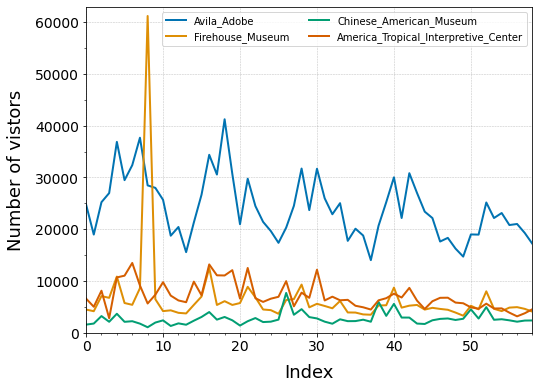

In [43]:
line=line()
line.plot(file='museum_visitors_line.csv', x_col_name = ['index'], y_col_name= ['Avila_Adobe','Firehouse_Museum','Chinese_American_Museum','America_Tropical_Interpretive_Center'],  
     legend_label=['Avila_Adobe','Firehouse_Museum','Chinese_American_Museum','America_Tropical_Interpretive_Center'],  
     x_label='Index', y_label='Number of vistors', x_range=[0,58], y_range=[0,63000], paper_type='single')

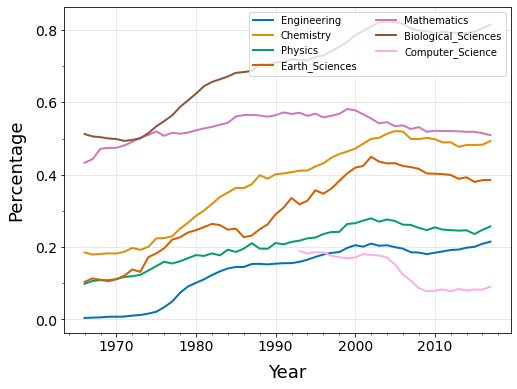

In [33]:
line.plot(file='women_fraction.xlsx', x_col_name = ['Year'], y_col_name= ['Engineering','Chemistry','Physics','Earth_Sciences','Mathematics','Biological_Sciences','Computer_Science'],  
     legend_label =['Engineering','Chemistry','Physics','Earth_Sciences','Mathematics','Biological_Sciences','Computer_Science'],  
     x_label='Year', y_label='Percentage',paper_type='single')

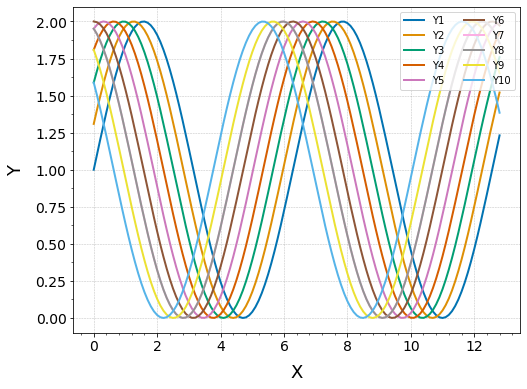

In [27]:
line.plot(file='line_chart_example_1.xlsx', x_col_name = ['X'], y_col_name= ['Y1','Y2','Y3','Y4','Y5','Y6','Y7','Y8','Y9','Y10'],
     legend_label=['Y1','Y2','Y3','Y4','Y5','Y6','Y7','Y8','Y9','Y10'], x_label='X', y_label='Y',paper_type='single')


## Multiple-Lines Chart with Marks

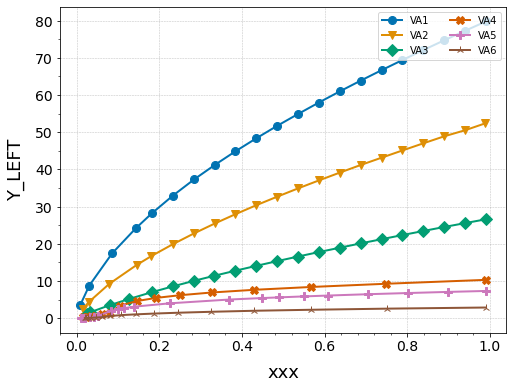

In [28]:
line.plot(file='isotherms_line_chart.xlsx',x_col_name = ['RP1','RP2','RP3','RP4','RP5','RP6'], y_col_name= ['VA1','VA2','VA3','VA4','VA5','VA6'],
     legend_label=['VA1','VA2','VA3','VA4','VA5','VA6'], x_label='xxx', y_label='Y_LEFT', markers=True, paper_type='single')

## Double Axis Line Chart 

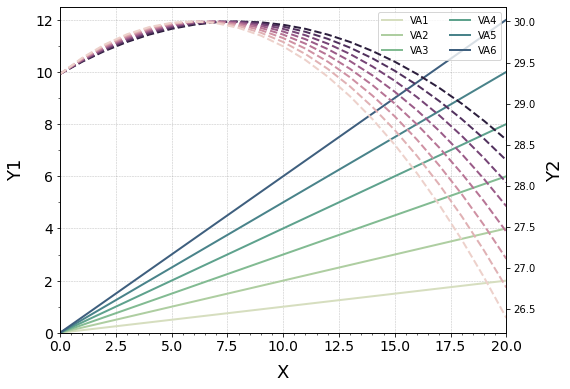

In [44]:
line.plot(file='line_chart_example_2.xlsx', x_col_name =[['index'],['index']], y_col_name= [['VA1','VA2','VA3','VA4','VA5','VA6'], ['Y1','Y2','Y3','Y4','Y5','Y6','Y7','Y8']],
     legend_label=[['VA1','VA2','VA3','VA4','VA5','VA6'], ['Y1','Y2','Y3','Y4','Y5','Y6','Y7','Y8']], x_label='X', y_label=['Y1', 'Y2'], double_axis=True, x_range=[0,20], y_range=[0,12.5], paper_type='single')

## Double Axis Line Chart with Inset Plot

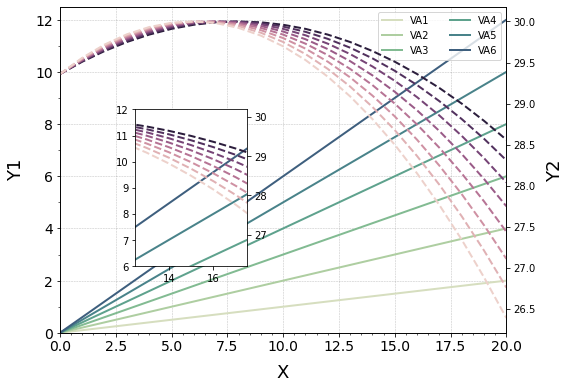

In [45]:
line.plot(file='line_chart_example_2.xlsx', x_col_name =[['index'],['index']], y_col_name= [['VA1','VA2','VA3','VA4','VA5','VA6'], ['Y1','Y2','Y3','Y4','Y5','Y6','Y7','Y8']],
     legend_label=[['VA1','VA2','VA3','VA4','VA5','VA6'], ['Y1','Y2','Y3','Y4','Y5','Y6','Y7','Y8']], x_label='X', y_label=['Y1', 'Y2'], 
     double_axis=True,inset = True, xin_start = 12.5, xin_end = 17.5, yin_start = 6, yin_end = 12,x_range=[0,20], y_range=[0,12.5], paper_type='single')



## Single Axis Line Chart with Inset Plot


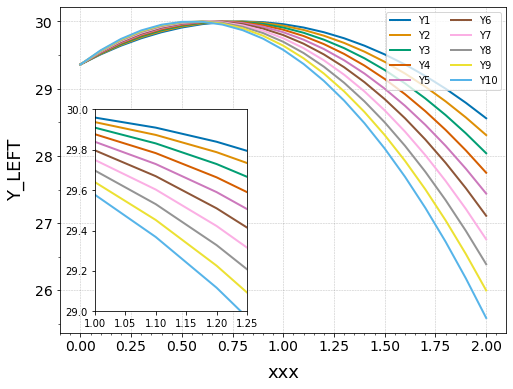

In [31]:
line.plot(file='line_chart_example_2.xlsx', x_col_name = ['X'], y_col_name= ['Y1','Y2','Y3','Y4','Y5','Y6','Y7','Y8','Y9','Y10'],
     legend_label=['Y1','Y2','Y3','Y4','Y5','Y6','Y7','Y8','Y9','Y10'], x_label='xxx', y_label='Y_LEFT', 
          inset = True, xin_start = 1, xin_end = 1.25, yin_start = 29, yin_end = 30,paper_type='single') 
